في تدريبنا العملي اليوم سننظر في المؤشرات الاجتماعية الاقتصادية. والفكرة هي أننا يمكن أن نقيس الخصائص، كالتركيبة السكانية، أو السمات الاجتماعية لمكان ما، وذلك باستعمال البيانات النصية بدلا من استعمال إحدى الأدوات المسحية. والسؤال المطروح هنا هو: ما هي اللغات التي تستعمل في عدد من الدول في المحتوى الرقمي؟ ونعني بالمحتوى الرقمي الويب والتغريدات.

فلنبدأ بتجهيز بيئة العمل.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


Done!


ستكون البيانات عبارة عن تغريدات. وعندنا قاعدة بيانات تمثل معظم دول العالم وتستعمل تغريدات تضم 17 بليون كلمة. وقاعدة بيانات أخرى تستعمل صفحات الويب وتتضمن 400 بليون كلمة. وتلك بيانات ضخمة جدا لا يمكن أن نعمل عليها هنا. ولذلك عالجنا قاعدتي البيانات مسبقا. وسنعمل فقط على بعض التجميعات. وهنا سنرفع ملف بصيغة CSV يتضمن تلك التجميعات.

In [2]:
file = os.path.join(ai.data_dir, "map.diversity.csv")
df = pd.read_csv(file)
print(df)

    iso3   Total_TW  Twitter: N. Languages   Total_CC  Web: N. Languages  \
0    ABW          0                      0   12555508                  4   
1    AFG   59404971                     15   38832308                  3   
2    AGO   27336852                      8   43341530                  3   
3    ALB   52865570                     15  330024553                  4   
4    AND   12422507                      6   82380309                  4   
..   ...        ...                    ...        ...                ...   
194  WSM    5577702                      8          0                  0   
195  YEM   36924012                      5          0                  0   
196  ZAF  231321197                      4          0                  0   
197  ZMB   35868340                      7     215464                  1   
198  ZWE   75896203                      5          0                  0   

     Twitter: HHI  Web: HHI  
0             NaN  0.404544  
1        0.160483  0.401860

يزودنا إطار البيانات هذا بالبيانات الخاصة بكل بلد. وتمثل الأرقام الموجودة في " المجموع Total " حجم البيانات المقدر بعدد الكلمات. وهذا يعني أن عندنا ما مجموعه 58 مليون كلمة من التغريدات تمثل أفغانستان. والرقم الذي يهمنا يتعلق بالتنوع اللغوي، فكم عدد اللغات المستعملة؟ ويكشف لنا عمود *N_Languages* عدد اللغات التي تمثل أكثر من 1% من بيانات أي دولة. فيما يعرفنا *HHI* بمؤشر هيرفندال – هيرشمان الذي يمثل مدى الاستحواذ في أي لغة. وهو مجموع مربع ما تسهم فيه أي لغة.

والآن لنرسم خريطة تكشف لنا التنوع اللغوي في المحتوى الرقمي معتمدين على حزمة *geopandas*. وسيحمل الكود البرمجي أدناه خريطة صماء من حزمة جيوباناداز، ويربطها ببياناتنا باستعمال معيار الآيزو3 لترميز اللغات في العمود المشترك. وسنستبعد القارة القطبية الجنوبية هنا لعدم الحاجة العملية لها.

In [3]:
import geopandas
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world.loc[43,"iso_a3"] = "FRA"
world.loc[21,"iso_a3"] = "NOR"

world = world.merge(right = df, how = "left", left_on = "iso_a3", right_on = "iso3")
world = world[world.name != "Antarctica"]
print(world)


       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry iso3    

والآن يمكننا توليد خريطة. ولنستعمل أولا إجمالي عدد الكلمات في التغريدات لكل دولة.

(-198.00000000000003, 198.00000000000006, -62.574678, 90.607978)

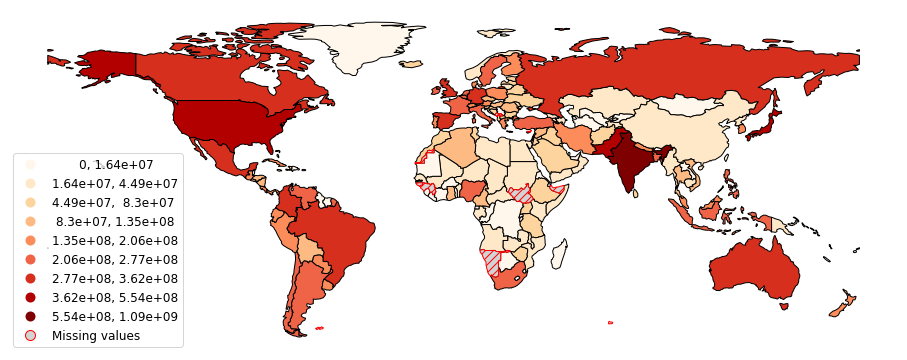

In [4]:
%matplotlib inline
ax = world.plot(column = "Total_TW",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 16),
            legend_kwds = {"fmt": "{:.3g}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

(-198.00000000000003,
 198.00000000000006,
 -62.574678000000006,
 90.60797800000003)

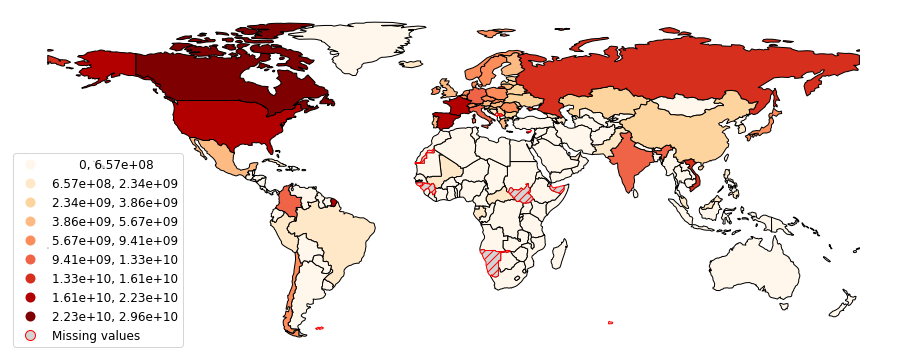

In [5]:
ax = world.plot(column = "Total_CC",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:.3g}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

وتتضمن مجموعة بيانات الويب (أعلاه) كما هائلا من البيانات لدول متفرقة، كأمريكا، وروسيا، وفرنسا، وكأن الدول الأخرى غير ممثلة تمثيلا جيدا. ورغم ذلك، نجد حتى الدول التي لديها مدونات ويب أصغر حجما، تحوز قدرا كبيرا من البيانات.

(-198.00000000000003, 198.00000000000006, -62.574678000000006, 90.607978)

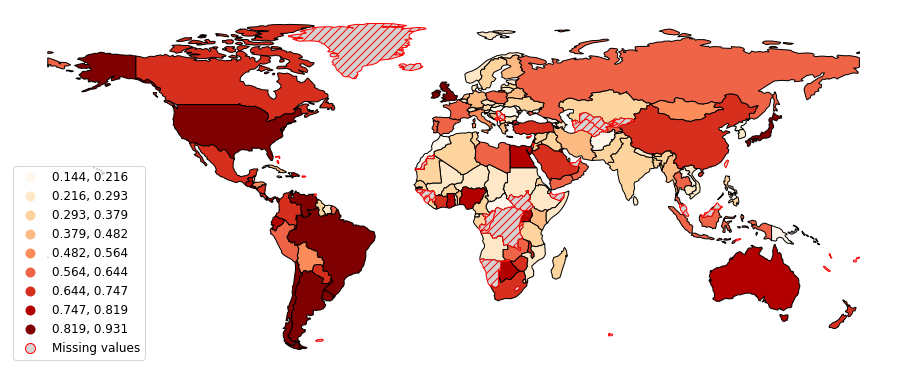

In [6]:
ax = world.plot(column = "Twitter: HHI",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:,.3f}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds = {"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

(-198.00000000000003,
 198.00000000000006,
 -62.574678000000006,
 90.60797800000003)

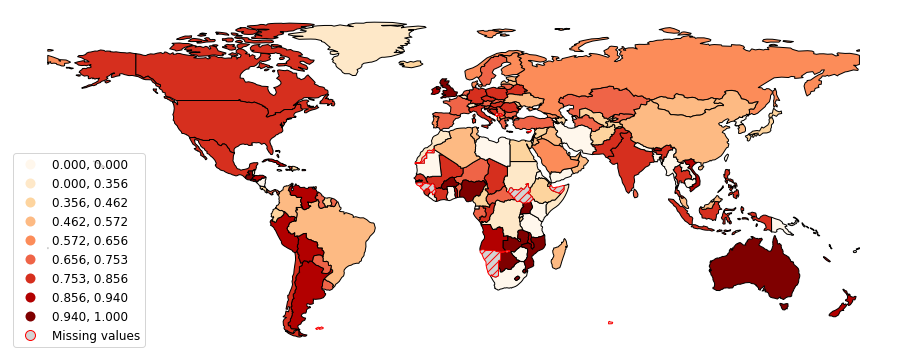

In [7]:
world.plot(column = "Web: HHI",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:,.3f}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds = {"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

هذا مختلف قليلا! فهذان المصدران يقفان على أنماط مختلفة من الاستعمال اللغوي.

لكننا هنا رأينا كيفية الوقوف على مؤشر نصي لخاصية ديموقرافية، وتحويله إلى تمثيل بياني جغرافي. وهذه عمليات تدرجية مفيدة، إذ انتقلنا من المصنف النصي (وسوم اللغات) إلى مقياس كمي (HHI)، ثم إلى خريطة التنوع اللغوي.